In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Generating random Lat. & Long, numbers for various cities around the world

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude from above
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


627

### Getting the weather data from a website using API and storing it in a list "city_data"

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# handling errors while parsing weather data from a JSON file using try-except
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | tiarei
Processing Record 7 of Set 1 | phirangipuram
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | crixas
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | ajdabiya
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | bae
Processing Record 19 of Set 1 | khajuraho
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | nanortalik
Processing Rec

Processing Record 36 of Set 4 | san andres
Processing Record 37 of Set 4 | tsotilion
Processing Record 38 of Set 4 | estelle
Processing Record 39 of Set 4 | amvrosiyivka
Processing Record 40 of Set 4 | dzhebariki-khaya
Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | praia
Processing Record 43 of Set 4 | maragogi
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | tripoli
Processing Record 46 of Set 4 | luganville
Processing Record 47 of Set 4 | sakakah
Processing Record 48 of Set 4 | krasnoselkup
Processing Record 49 of Set 4 | asuncion nochixtlan
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | cape coast
Processing Record 2 of Set 5 | avera
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | gogrial
Processing Record 5 of Set 5 | wanlaweyn
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | ksenyevka
City not found. Skipping...
Processing Reco

Processing Record 27 of Set 8 | khanpur
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | dinsor
City not found. Skipping...
Processing Record 30 of Set 8 | pangody
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | tiznit
Processing Record 33 of Set 8 | angra
City not found. Skipping...
Processing Record 34 of Set 8 | oxford
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | lai
Processing Record 37 of Set 8 | tupancireta
Processing Record 38 of Set 8 | gondanglegi
Processing Record 39 of Set 8 | changying
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | giaveno
Processing Record 42 of Set 8 | najran
Processing Record 43 of Set 8 | babanusah
City not found. Skipping...
Processing Record 44 of Set 8 | guaruja
Processing Record 45 of Set 8 | kaduna
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | aljezur
Processing Record 48 of Set 8 | mikuni


Processing Record 16 of Set 12 | nicoya
Processing Record 17 of Set 12 | nguiu
City not found. Skipping...
Processing Record 18 of Set 12 | jiddah
City not found. Skipping...
Processing Record 19 of Set 12 | pilar
Processing Record 20 of Set 12 | qaqortoq
Processing Record 21 of Set 12 | sao joao da barra
Processing Record 22 of Set 12 | tukan
Processing Record 23 of Set 12 | saint-pierre
Processing Record 24 of Set 12 | mosquera
Processing Record 25 of Set 12 | beringovskiy
Processing Record 26 of Set 12 | san isidro
Processing Record 27 of Set 12 | yanliang
Processing Record 28 of Set 12 | howard springs
Processing Record 29 of Set 12 | gillette
Processing Record 30 of Set 12 | kenai
Processing Record 31 of Set 12 | banjar
Processing Record 32 of Set 12 | champagnole
Processing Record 33 of Set 12 | portmore
Processing Record 34 of Set 12 | acarau
Processing Record 35 of Set 12 | luanda
Processing Record 36 of Set 12 | dongzhen
Processing Record 37 of Set 12 | brovst
Processing Recor

### Converting the array of dictionaries (city_data, which has all the data from API) to a DataFrame

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,50.49,66,100,3.98,NZ,2021-09-19 01:41:37
1,Port Elizabeth,-33.9180,25.5701,61.09,77,0,13.80,ZA,2021-09-19 01:41:37
2,Vaini,-21.2000,-175.2000,71.76,94,90,10.36,TO,2021-09-19 01:41:38
3,Bluff,-46.6000,168.3333,50.81,70,100,13.20,NZ,2021-09-19 01:41:38
4,Tiarei,-17.5333,-149.3333,80.62,79,81,18.81,PF,2021-09-19 01:41:38
5,Phirangipuram,16.3000,80.2667,80.17,70,99,1.36,IN,2021-09-19 01:41:39
6,Jamestown,42.0970,-79.2353,65.52,88,1,4.61,US,2021-09-19 01:37:09
7,Norman Wells,65.2820,-126.8329,51.84,62,75,13.80,CA,2021-09-19 01:41:39
8,Ribeira Grande,38.5167,-28.7000,68.29,68,94,7.63,PT,2021-09-19 01:41:39
9,Crixas,-14.5489,-49.9692,79.72,17,6,5.68,BR,2021-09-19 01:41:39


In [9]:
# reaaranging the order in which the columns appaer in the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-09-19 01:41:37,-46.1927,168.8643,50.49,66,100,3.98
1,Port Elizabeth,ZA,2021-09-19 01:41:37,-33.9180,25.5701,61.09,77,0,13.80
2,Vaini,TO,2021-09-19 01:41:38,-21.2000,-175.2000,71.76,94,90,10.36
3,Bluff,NZ,2021-09-19 01:41:38,-46.6000,168.3333,50.81,70,100,13.20
4,Tiarei,PF,2021-09-19 01:41:38,-17.5333,-149.3333,80.62,79,81,18.81
...,...,...,...,...,...,...,...,...,...
570,Trat,TH,2021-09-19 01:44:21,12.5000,102.5000,87.26,87,100,3.09
571,Sao Felix Do Xingu,BR,2021-09-19 01:44:22,-6.6447,-51.9950,77.04,53,11,0.85
572,Bereda,ES,2021-09-19 01:44:22,43.2686,-7.5406,54.00,100,78,1.16
573,Solnechnyy,RU,2021-09-19 01:44:22,50.7214,136.6319,55.96,30,0,13.82


### Exporting the DataFrame to a comma-separated (CSV) file.

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plotting the data

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


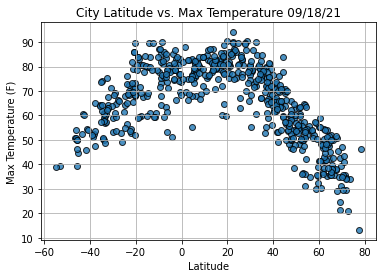

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

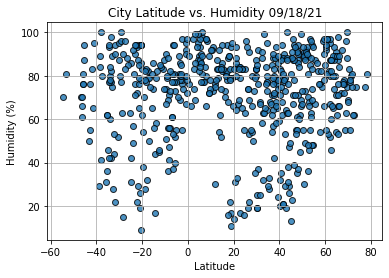

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

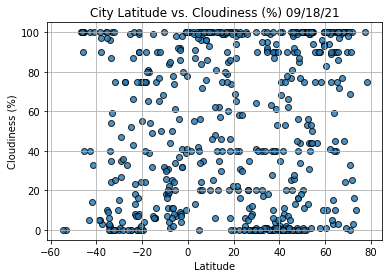

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

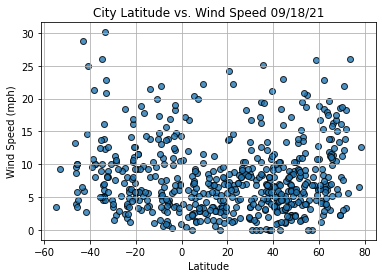

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### using SciPy Linear Regression to calculate slope, intercept, r-value, p-value, & stdev

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


### create Northern Hemisphere DataFrames from the city_data_df DataFrame to which we apply the above linear regression function

In [17]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2021-09-19 01:37:56
Lat                      -42.8794
Lng                      147.3294
Max Temp                    60.66
Humidity                       55
Cloudiness                     40
Wind Speed                  28.77
Name: 13, dtype: object

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

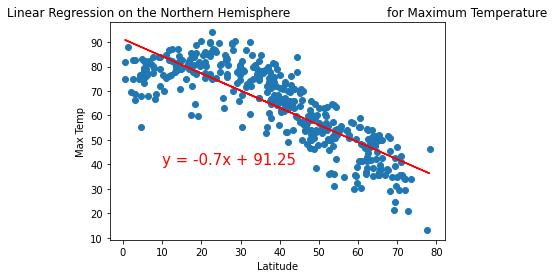

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,30))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

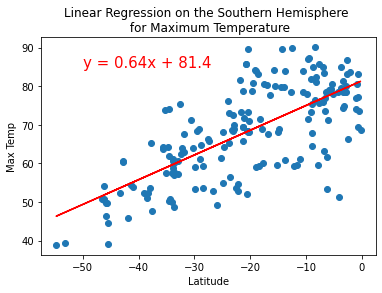

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85)) 

In [21]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"The r-value for northern hemisphere is: {r_value:.3f}")

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"The r-value for southern hemisphere is: {r_value:.3f}")

The r-value for northern hemisphere is: -0.833
The r-value for southern hemisphere is: 0.712


### Perform Linear Regression on the Humidity for the Northern & Southern Hemisphere

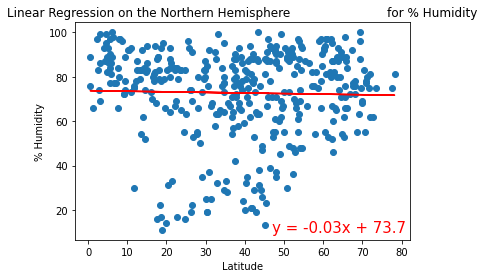

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(47,10))

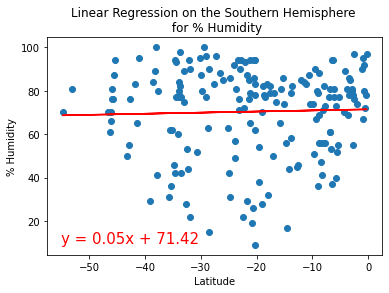

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10))

In [33]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(f"The r-value for northern hemisphere is: {r_value:.3f}")

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(f"The r-value for southern hemisphere is: {r_value:.3f}")

The r-value for northern hemisphere is: -0.025
The r-value for southern hemisphere is: 0.033


### Perform Linear Regression on the Cloudiness for the Northern & Southern Hemisphere

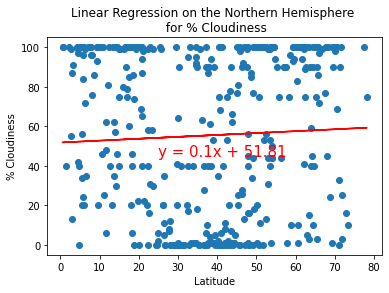

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(25,45))

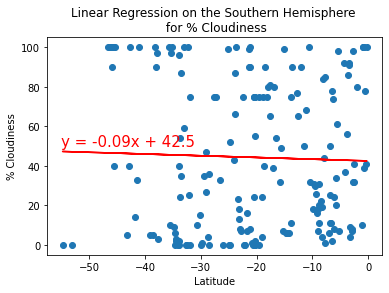

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,50))

In [51]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f"The r-value for northern hemisphere is: {r_value:.3f}")

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f"The r-value for southern hemisphere is: {r_value:.3f}")

The r-value for northern hemisphere is: 0.046
The r-value for southern hemisphere is: -0.031


### Perform Linear Regression on the Wind Speed for the Northern & Southern Hemisphere

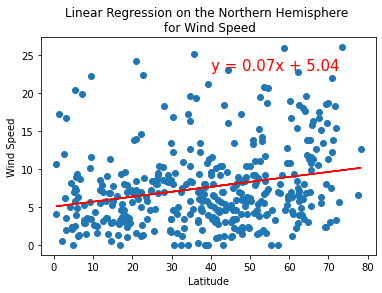

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,23))

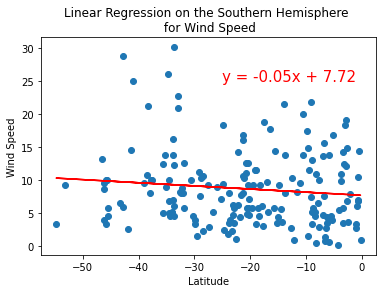

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))

In [57]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(f"The r-value for northern hemisphere is: {r_value:.3f}")

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(f"The r-value for southern hemisphere is: {r_value:.3f}")

The r-value for northern hemisphere is: 0.239
The r-value for southern hemisphere is: -0.112


### Using Google API to create Heatmaps